# Goedaardig vs kwaadaardige tumoren met maar 2 regressoren (inputs)

We voorspellen of een tumor goedaardig (_benign_ of kortweg _B_) is, of de patiënt weldegelijk borstkanker heeft en de tumor dus kwaardaardig (_malignant_ of kortweg _M_) is, maar we gebruiken __maar 2 regressoren__, zodat we de data kunnen plotten.

In [106]:
from toepassing_procedures import *
import numpy as np
# data inladen
import pandas as pd
from pandas import read_csv
# data opsplitsen in trainings-, validatie- en testset
from sklearn.model_selection import train_test_split
# grafieken
from matplotlib import pyplot as plt
# nodig voor het maken van het svm model
from sklearn import svm
# nodig om accuraatheid van de voorspellingen te bekijken
from sklearn import metrics

In [107]:
# We laden de data
gegevens = read_csv("data.csv")

# We genereren een random random_state
random_state = np.random.randint(100)

# We verdelen de data in 50% training, 25% validatie en 25% test
tmp, testData = train_test_split(gegevens, test_size=0.25, random_state=random_state)
trainingData, validatieData = train_test_split(tmp, test_size=0.33, random_state=random_state)

# Print the shapes of the resulting datasets
print(f"Grootte training data: \t{trainingData.shape} (50%)")
print(f"Grootte validatie data: {validatieData.shape} (25%)")
print(f"Grootte test data: \t{testData.shape} (25%)")


Grootte training data: 	(285, 33) (50%)
Grootte validatie data: (141, 33) (25%)
Grootte test data: 	(143, 33) (25%)


In [108]:
print(trainingData.head())

          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
110   864033         B        9.777         16.99           62.50      290.2   
374  9013005         B       13.690         16.07           87.84      579.1   
504   915186         B        9.268         12.87           61.49      248.7   
560   925292         B       14.050         27.15           91.38      600.4   
462  9113156         B       14.400         26.99           92.25      646.1   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
110          0.10370           0.08404         0.04334              0.01778   
374          0.08302           0.06374         0.02556              0.02031   
504          0.16340           0.22390         0.09730              0.05252   
560          0.09929           0.11260         0.04462              0.04304   
462          0.06995           0.05223         0.03476              0.01737   

     ...  texture_worst  perimeter_worst  ar

In [109]:
# We tellen het aantal diagnoses in de training data
diagnosesTotaal = trainingData['diagnosis'].value_counts()

print(diagnosesTotaal)

aantalGoedaardig = diagnosesTotaal[0]
aantalKwaadaardig = diagnosesTotaal[1]

print(f"Er zijn {aantalGoedaardig} goedaardige tumoren en {aantalKwaadaardig} kwaadaardige tumoren in de training data.")

B    182
M    103
Name: diagnosis, dtype: int64
Er zijn 182 goedaardige tumoren en 103 kwaadaardige tumoren in de training data.


In [110]:
# We selecteren de kolommen met de features (x-waarden)
trainingFeatures = trainingData.iloc[:,2:4]
validatieFeatures = validatieData.iloc[:,2:4]
testFeatures = testData.iloc[:,2:4]

# We selecteren de kolom met de diagnoses (y-waarden)
trainingDiagnoses = trainingData.iloc[:,1]
validatieDiagnoses = validatieData.iloc[:,1]
testDiagnoses = testData.iloc[:,1]

In [144]:
# We halen de namen op van de inputs die we onderzoeken
input1 = trainingFeatures.columns[0]
input2 = trainingFeatures.columns[1]

In [111]:
print(trainingFeatures)

     radius_mean  texture_mean
110        9.777         16.99
374       13.690         16.07
504        9.268         12.87
560       14.050         27.15
462       14.400         26.99
..           ...           ...
338       10.050         17.53
380       11.270         12.96
514       15.050         19.07
320       10.250         16.18
398       11.060         14.83

[285 rows x 2 columns]


In [112]:
print(trainingDiagnoses)

110    B
374    B
504    B
560    B
462    B
      ..
338    B
380    B
514    M
320    B
398    B
Name: diagnosis, Length: 285, dtype: object


In [113]:
# we halen de waardes van de feautures op
trainingX = trainingFeatures.values
validatieX = validatieFeatures.values
testX = testFeatures.values

print(trainingX)

[[ 9.777 16.99 ]
 [13.69  16.07 ]
 [ 9.268 12.87 ]
 [14.05  27.15 ]
 [14.4   26.99 ]
 [10.32  16.35 ]
 [13.64  15.6  ]
 [11.99  24.89 ]
 [20.16  19.66 ]
 [24.25  20.2  ]
 [12.9   15.92 ]
 [17.54  19.32 ]
 [12.05  14.63 ]
 [23.51  24.27 ]
 [13.27  14.76 ]
 [14.9   22.53 ]
 [12.89  14.11 ]
 [12.25  17.94 ]
 [15.    15.51 ]
 [18.22  18.87 ]
 [14.04  15.98 ]
 [14.53  19.34 ]
 [11.29  13.04 ]
 [11.25  14.78 ]
 [13.86  16.93 ]
 [11.31  19.04 ]
 [25.22  24.91 ]
 [ 9.847 15.68 ]
 [12.05  22.72 ]
 [14.96  19.1  ]
 [13.5   12.71 ]
 [10.44  15.46 ]
 [15.12  16.68 ]
 [17.14  16.4  ]
 [12.83  22.33 ]
 [14.26  19.65 ]
 [20.57  17.77 ]
 [ 9.    14.4  ]
 [11.47  16.03 ]
 [14.58  13.66 ]
 [ 9.738 11.97 ]
 [19.8   21.56 ]
 [14.68  20.13 ]
 [17.19  22.07 ]
 [12.76  18.84 ]
 [15.7   20.31 ]
 [13.74  17.91 ]
 [ 8.618 11.79 ]
 [ 8.95  15.76 ]
 [13.66  15.15 ]
 [12.45  16.41 ]
 [16.11  18.05 ]
 [17.99  10.38 ]
 [ 9.742 19.12 ]
 [14.6   23.29 ]
 [20.18  23.97 ]
 [12.34  26.86 ]
 [ 9.333 21.94 ]
 [10.26  12.22

In [114]:
# we halen de waardes van de diagnoses op
trainingY = trainingDiagnoses.values
validatieY = validatieDiagnoses.values
testY = testDiagnoses.values

print(trainingY)

['B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B'
 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B'
 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M'
 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M'
 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M'
 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M

In [115]:
# Dit is de classifier of classificator
# We gebruiken de kernel trick om de data te kunnen scheiden
# In dit geval gebruiken we een lineaire kernel
clf = svm.SVC(kernel='linear')

# We trainen de classifier met de training data
clf.fit(trainingX,trainingY)

# We voorspellen de diagnoses van de validatie data
validatieVoorspellingen = clf.predict(validatieX)

print(validatieVoorspellingen)

['M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B'
 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M']


In [116]:
# we berekenen de accuraatheid van de voorspellingen
accuraatheid = metrics.accuracy_score(validatieY, validatieVoorspellingen)
print(f"De accuraatheid van de voorspellingen is {accuraatheid*100:.2f}%")

De accuraatheid van de voorspellingen is 93.62%


### Validatiegegevens gebruiken om de 3 meta-parameters te bepalen.

#### C-term<br>
De C-term staat voor de __foutentoleratie__ van het model.<br><br>
*Kleine waarden voor C:* <br>
Wanneer C klein is, laat het model meer fouten toe, waardoor de beslissingsgrens eenvoudiger wordt.<br><br>
*Grote waarden voor C:* <br>
Wanneer C groot is, laat het model een laag aantal fouten toe, waardoor de beslissingsgrens complexer wordt.<br>

In [117]:
# De C-term is een metaparameter en staat voor de foutentoleratie van het model.
mogelijkeCs = [c for c in range(1, 10)]

hoogsteAccuraatheid = 0
cOpt = 0

# Overloop verschillende waarden voor C
for C in mogelijkeCs:

    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(trainingX, trainingY)
    validatieVoorspellingen = clf.predict(validatieX)
    accuraatheid = metrics.accuracy_score(validatieY, validatieVoorspellingen)

    print(f"De accuraatheid van de voorspellingen op de validatiedata is {accuraatheid*100:.5f}% met C={C}")

    if accuraatheid > hoogsteAccuraatheid:
        hoogsteAccuraatheid = accuraatheid
        cOpt = C

print(f"\nDe optimale waarde voor C is {cOpt} met een accuraatheid van {hoogsteAccuraatheid*100:.2f}%")

De accuraatheid van de voorspellingen op de validatiedata is 93.61702% met C=1
De accuraatheid van de voorspellingen op de validatiedata is 93.61702% met C=2
De accuraatheid van de voorspellingen op de validatiedata is 93.61702% met C=3
De accuraatheid van de voorspellingen op de validatiedata is 93.61702% met C=4
De accuraatheid van de voorspellingen op de validatiedata is 93.61702% met C=5
De accuraatheid van de voorspellingen op de validatiedata is 93.61702% met C=6
De accuraatheid van de voorspellingen op de validatiedata is 93.61702% met C=7
De accuraatheid van de voorspellingen op de validatiedata is 93.61702% met C=8
De accuraatheid van de voorspellingen op de validatiedata is 93.61702% met C=9

De optimale waarde voor C is 1 met een accuraatheid van 93.62%


#### Kernel<br>
De kernel zegt het model welke 'trick' het het moet gebruiken om de data te scheiden.

In [118]:
# De kernel zegt het model welke 'trick' het het moet gebruiken om de data te scheiden.
mogelijkeKernels = ['linear', 'poly', 'rbf', 'sigmoid']

optKernel = ""
hoogsteAccuraatheid = 0

for kernel in mogelijkeKernels:

    clf = svm.SVC(kernel=kernel, C=cOpt)
    clf.fit(trainingX, trainingY)
    validatieVoorspellingen = clf.predict(validatieX)
    accuraatheid = metrics.accuracy_score(validatieY, validatieVoorspellingen)

    print(f"De accuraatheid van de voorspellingen op de validatiedata is {accuraatheid*100:.5f}% met de kernel '{kernel}' en C={cOpt}")

    if accuraatheid > hoogsteAccuraatheid:
        hoogsteAccuraatheid = accuraatheid
        optKernel = kernel

print(f"\nDe optimale kernel is '{optKernel}' met een accuraatheid van {hoogsteAccuraatheid*100:.2f}% voor C={cOpt}")

De accuraatheid van de voorspellingen op de validatiedata is 93.61702% met de kernel 'linear' en C=1
De accuraatheid van de voorspellingen op de validatiedata is 91.48936% met de kernel 'poly' en C=1
De accuraatheid van de voorspellingen op de validatiedata is 90.78014% met de kernel 'rbf' en C=1
De accuraatheid van de voorspellingen op de validatiedata is 61.70213% met de kernel 'sigmoid' en C=1

De optimale kernel is 'linear' met een accuraatheid van 93.62% voor C=1


#### Gamma<br>
De $\gamma$ staat voor de __foutentoleratie__ van het model.<br><br>
*Kleine waarden voor $\gamma$:* <br>
Een te lage gamma-waarde kan leiden tot _overgeneralisatie_, waarbij de beslissingsgrens te eenvoudig is en het model niet goed presteert op de trainingsgegevens.<br><br>
*Grote waarden voor $\gamma$:* <br>
Een te hoge gamma-waarde kan leiden tot _overfitting_, waarbij het model de trainingsgegevens te nauw volgt en dus niet goed zal presteren op nog niet eerder geziene gegevens.<br>

In [119]:
# De C-term is een metaparameter en staat voor de foutentoleratie van het model.
mogelijkeGammas = [gamma for gamma in range(1, 10)]

hoogsteAccuraatheid = 0
gammaOpt = 0

# Overloop verschillende waarden voor C
for gamma in mogelijkeGammas:

    clf = svm.SVC(kernel=optKernel, C=cOpt, gamma=gamma)
    clf.fit(trainingX, trainingY)
    validatieVoorspellingen = clf.predict(validatieX)
    accuraatheid = metrics.accuracy_score(validatieY, validatieVoorspellingen)

    print(f"De accuraatheid van de voorspellingen op de validatiedata is {accuraatheid*100:.5f}% met gamma={gamma}, de kernel '{optKernel}' en C={cOpt}")

    if accuraatheid > hoogsteAccuraatheid:
        hoogsteAccuraatheid = accuraatheid
        gammaOpt = gamma

print(f"\nDe optimale waarde voor gamma is {gammaOpt} met een accuraatheid van {hoogsteAccuraatheid*100:.2f}% voor de kernel '{optKernel}' en C={cOpt}")

De accuraatheid van de voorspellingen op de validatiedata is 93.61702% met gamma=1, de kernel 'linear' en C=1
De accuraatheid van de voorspellingen op de validatiedata is 93.61702% met gamma=2, de kernel 'linear' en C=1
De accuraatheid van de voorspellingen op de validatiedata is 93.61702% met gamma=3, de kernel 'linear' en C=1
De accuraatheid van de voorspellingen op de validatiedata is 93.61702% met gamma=4, de kernel 'linear' en C=1
De accuraatheid van de voorspellingen op de validatiedata is 93.61702% met gamma=5, de kernel 'linear' en C=1
De accuraatheid van de voorspellingen op de validatiedata is 93.61702% met gamma=6, de kernel 'linear' en C=1
De accuraatheid van de voorspellingen op de validatiedata is 93.61702% met gamma=7, de kernel 'linear' en C=1
De accuraatheid van de voorspellingen op de validatiedata is 93.61702% met gamma=8, de kernel 'linear' en C=1
De accuraatheid van de voorspellingen op de validatiedata is 93.61702% met gamma=9, de kernel 'linear' en C=1

De optima

### Toepassen op de testdata

In [136]:
clf = svm.SVC(kernel=optKernel, C=cOpt, gamma=gammaOpt)
clf.fit(trainingX, trainingY)
testVoorspellingen = clf.predict(testX)
accuraatheid = metrics.accuracy_score(testY, testVoorspellingen)

print(f"De accuraatheid van de voorspellingen op de testdata is {accuraatheid*100:.2f}% voor de kernel '{optKernel}', C={cOpt} en gamma={gammaOpt}")

De accuraatheid van de voorspellingen op de testdata is 87.41% voor de kernel 'linear', C=1 en gamma=1


### Visuele voorstelling

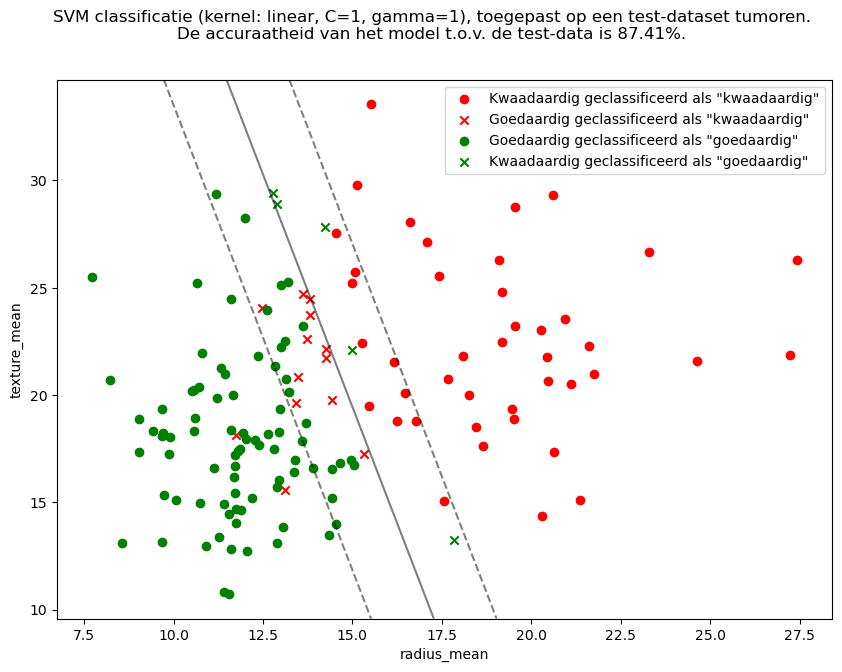

In [151]:
import matplotlib.pyplot as plt

# Punten die geclassificeerd worden als goedaardig maar kwaadaardig zijn
falsePositives = np.where((testVoorspellingen == 'B') & (testY == 'M'))
# Punten die geclassificeerd worden als goedaardig en ook goedaardig zijn
truePositives = np.where((testVoorspellingen == 'B') & (testY == 'B'))
# Punten die geclassificeerd worden als kwaadaardig maar goedaardig zijn
falseNegatives = np.where((testVoorspellingen == 'M') & (testY == 'B'))
# Punten die geclassificeerd worden als kwaadaardig en ook kwaadaardig zijn
trueNegatives = np.where((testVoorspellingen == 'M') & (testY == 'M'))

plt.figure(figsize=(10, 7))
plt.suptitle(f"SVM classificatie (kernel: {optKernel}, C={cOpt}, gamma={gammaOpt}), toegepast op een test-dataset tumoren.\nDe accuraatheid van het model t.o.v. de test-data is {accuraatheid*100:.2f}%.")
plt.scatter(testX[trueNegatives, 0], testX[trueNegatives, 1], c='r', marker='o', label='Kwaadaardig geclassificeerd als "kwaadaardig"')
plt.scatter(testX[falsePositives, 0], testX[falsePositives, 1], c='r', marker='x', label='Goedaardig geclassificeerd als "kwaadaardig"')
plt.scatter(testX[truePositives, 0], testX[truePositives, 1], c='g', marker='o', label='Goedaardig geclassificeerd als "goedaardig"')
plt.scatter(testX[falseNegatives, 0], testX[falseNegatives, 1], c='g', marker='x', label='Kwaadaardig geclassificeerd als "goedaardig"')

# Beslissingslijn plotten
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel(input1)
plt.ylabel(input2)
plt.legend()
plt.savefig('svm-classificatie-2-inputs.pdf')
plt.show()